In [150]:
import numpy as np
import matplotlib

In [151]:
import seaborn as sns

In [152]:
import pandas as pd

In [153]:
df = pd.read_csv('price.csv')

In [154]:
df

,_id,SN,Commodity,Date,Unit,Minimum,Maximum,Average
0,1,0,Tomato Big(Nepali),2013-06-16T00:00:00,Kg,35,40,37.5
1,2,1,Tomato Small(Local),2013-06-16T00:00:00,Kg,26,32,29.0
2,3,2,Potato Red,2013-06-16T00:00:00,Kg,20,21,20.5
3,4,3,Potato White,2013-06-16T00:00:00,Kg,15,16,15.5
4,5,4,Onion Dry (Indian),2013-06-16T00:00:00,Kg,28,30,29.0
...,...,...,...,...,...,...,...,...
197156,197157,197156,Garlic Dry Nepali,2021-05-13T00:00:00,Kg,100,120,110.0
197157,197158,197157,Fish Fresh(Rahu),2021-05-13T00:00:00,KG,270,280,275.0
197158,197159,197158,Fish Fresh(Bachuwa),2021-05-13T00:00:00,KG,225,235,230.0
197159,197160,197159,Fish Fresh(Chhadi),2021-05-13T00:00:00,KG,220,230,225.0


In [155]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 197161 entries, 0 to 197160
Data columns (total 8 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   _id        197161 non-null  int64  
 1   SN         197161 non-null  int64  
 2   Commodity  197161 non-null  object 
 3   Date       197161 non-null  object 
 4   Unit       197161 non-null  object 
 5   Minimum    197161 non-null  int64  
 6   Maximum    197161 non-null  int64  
 7   Average    197161 non-null  float64
dtypes: float64(1), int64(4), object(3)
memory usage: 12.0+ MB


In [156]:
df.isnull().sum()

_id          0
SN           0
Commodity    0
Date         0
Unit         0
Minimum      0
Maximum      0
Average      0
dtype: int64

In [157]:
df.columns

Index(['_id', 'SN', 'Commodity', 'Date', 'Unit', 'Minimum', 'Maximum',
       'Average'],
      dtype='object')

In [158]:
newdata=df.copy()

In [159]:
newdata["Date"][50]

'2013-06-16T00:00:00'

In [160]:
#splitting date
newdata["Date"] = pd.to_datetime(newdata["Date"])
str =newdata["Date"][1]
print(str)

2013-06-16 00:00:00


In [161]:
dict = {1:'Jaunary',2:'February',3:'March',4:'April',5:'May',6:'Jnue',7:'July',8:'August',9:'September',10:'October',11:'November',12:'December'}
print(dict)

{1: 'Jaunary', 2: 'February', 3: 'March', 4: 'April', 5: 'May', 6: 'Jnue', 7: 'July', 8: 'August', 9: 'September', 10: 'October', 11: 'November', 12: 'December'}


In [162]:
newdata["month"]=newdata["Date"].dt.month
newdata["day"]=newdata["Date"].dt.day
newdata

,_id,SN,Commodity,Date,Unit,Minimum,Maximum,Average,month,day
0,1,0,Tomato Big(Nepali),2013-06-16,Kg,35,40,37.5,6,16
1,2,1,Tomato Small(Local),2013-06-16,Kg,26,32,29.0,6,16
2,3,2,Potato Red,2013-06-16,Kg,20,21,20.5,6,16
3,4,3,Potato White,2013-06-16,Kg,15,16,15.5,6,16
4,5,4,Onion Dry (Indian),2013-06-16,Kg,28,30,29.0,6,16
...,...,...,...,...,...,...,...,...,...,...
197156,197157,197156,Garlic Dry Nepali,2021-05-13,Kg,100,120,110.0,5,13
197157,197158,197157,Fish Fresh(Rahu),2021-05-13,KG,270,280,275.0,5,13
197158,197159,197158,Fish Fresh(Bachuwa),2021-05-13,KG,225,235,230.0,5,13
197159,197160,197159,Fish Fresh(Chhadi),2021-05-13,KG,220,230,225.0,5,13


In [163]:
newdata=newdata.head(100000)

(100000, 10)

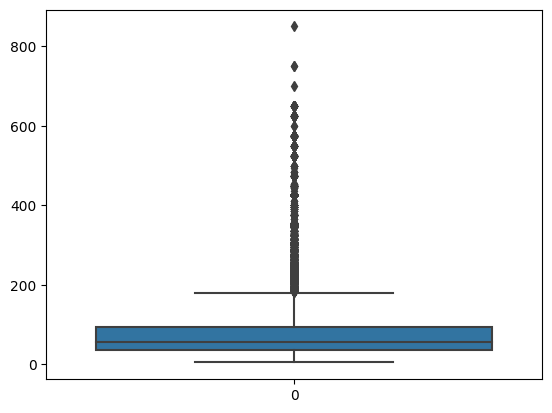

In [164]:
#useing box plot
sns.boxplot(newdata['Average'])
newdata.shape

In [165]:

q_low = newdata["Average"].quantile(0.25)
q_hi  = newdata["Average"].quantile(0.75)

newdata_filtered = newdata[(newdata["Average"] < q_hi) & (newdata["Average"] > q_low)]

<AxesSubplot: >

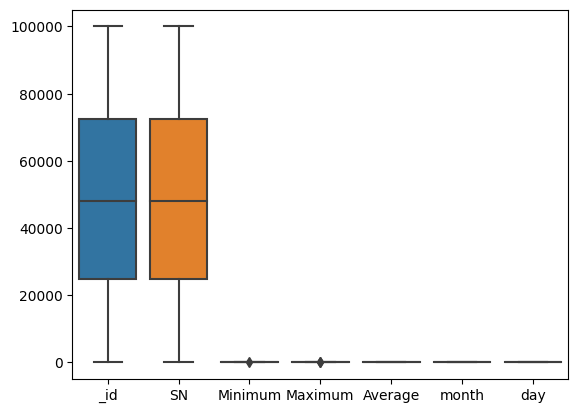

In [172]:
import matplotlib
sns.boxplot(newdata_filtered)

In [173]:
mod_data=newdata_filtered.copy()

In [174]:
mod_data.columns

Index(['_id', 'SN', 'Commodity', 'Date', 'Unit', 'Minimum', 'Maximum',
       'Average', 'month', 'day'],
      dtype='object')

In [175]:
import plotly.express as px

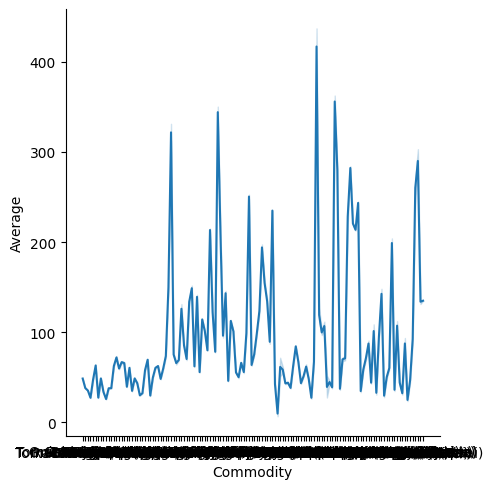

In [176]:
sns.relplot(data=df, x="Commodity", y="Average",kind="line")